### Importing Libraries and dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Description:

This dataset has been gathered from PakWheels, a highly reputable online platform dedicated to the sale of pre-owned vehicles. It encompasses a vast collection of more than 78,000 cars, each characterized by 13 distinct attributes, with the selling price as the focal point of analysis. These attributes include:

ad_ref: A unique reference number for each advertisement.

city: The city where the vehicle is advertised and sold, offering insights into regional market dynamics.

assembly: Indicates whether the vehicle is imported or locally assembled, providing context on manufacturing origins.

body: Describes the body type of the vehicle, such as sedan, SUV, or hatchback, influencing buyer preferences.

make: Represents the manufacturer of the vehicle, crucial for brand-specific analysis and market trends.

model: Denotes the specific variant or model of the vehicle, offering granularity in understanding consumer choices.

year: Signifies the production year of the vehicle, essential for tracking market trends and aging patterns.

engine_cc: Indicates the engine volume of the vehicle in cubic centimeters, influencing performance and pricing.

transmission: Specifies the transmission type, distinguishing between automatic and manual, reflecting buyer preferences.

fuel_type: Defines the fuel type used by the vehicle, whether petrol, diesel, or hybrid, reflecting environmental and economic considerations.

color: Represents the exterior color of the vehicle, an influential factor in buyer decision-making.
registered: Displays the registration number, including the city or province, providing insights into regional demand.

mileage: Represents the mileage of the vehicle in kilometers, a critical factor indicating usage and potential wear.

price: Quantifies the selling price of the vehicle in Pakistani Rupees (PKR), the primary focus for investors and buyers alike.

This rich dataset encapsulates diverse aspects of the pre-owned car market, enabling comprehensive analysis of buyer preferences, market trends, and regional variations. These attributes collectively provide invaluable insights for investors, allowing them to make informed decisions, identify profitable opportunities, and navigate the dynamic landscape of the second-hand car market.

### Loading dataset

In [2]:
df= pd.read_csv("pakwheels_used_car_data_v02.csv")
df.head()

,addref,city,assembly,body,make,model,year,engine,transmission,fuel,color,registered,mileage,price
0,7943732,Peshawar,NaN,Sedan,Toyota,Corolla,2013.0,1300.0,Manual,Petrol,Silver Metallic,Lahore,145000,2870000.0
1,7730314,Lahore,NaN,Sedan,Honda,City,2000.0,1300.0,Manual,Petrol,Blue,Lahore,230000,995000.0
2,7943737,Lahore,NaN,Sedan,Toyota,Yaris,2021.0,1300.0,Manual,Petrol,Super White,Punjab,60500,3585000.0
3,7943733,Lahore,NaN,Hatchback,Suzuki,Swift,2017.0,1300.0,Manual,Petrol,Grey,Islamabad,87000,2250000.0
4,7923484,Lahore,NaN,Sedan,Honda,Civic,2017.0,1800.0,Automatic,Petrol,Grey,Lahore,86000,4850000.0


### Data Cleaning

In [3]:
df.isnull().sum()

addref              0
city                0
assembly        53689
body             8904
make                0
model               0
year             4779
engine              3
transmission        0
fuel              906
color            1480
registered          0
mileage             0
price             583
dtype: int64

In [4]:
# Replace null values in the 'assembly' column with 'local'
df['assembly'].fillna('local', inplace=True)


In [5]:
#df.drop('assembly',axis= 1, inplace =True)

In [6]:
df.dropna(inplace=True)

### Basic Data Summary

In [7]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63370 entries, 0 to 77877
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   addref        63370 non-null  int64  
 1   city          63370 non-null  object 
 2   assembly      63370 non-null  object 
 3   body          63370 non-null  object 
 4   make          63370 non-null  object 
 5   model         63370 non-null  object 
 6   year          63370 non-null  float64
 7   engine        63370 non-null  float64
 8   transmission  63370 non-null  object 
 9   fuel          63370 non-null  object 
 10  color         63370 non-null  object 
 11  registered    63370 non-null  object 
 12  mileage       63370 non-null  int64  
 13  price         63370 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 7.3+ MB


In [8]:
# Summary statistics
df.describe()

,addref,year,engine,mileage,price
count,6.337000e+04,63370.000000,63370.000000,63370.000000,6.337000e+04
mean,7.814349e+06,2013.347436,1396.850339,91223.103519,3.868848e+06
std,2.562486e+05,7.159885,636.744266,83514.852160,5.446117e+06
min,4.478110e+05,1990.000000,100.000000,1.000000,1.100000e+05
25%,7.808708e+06,2008.000000,1000.000000,38000.000000,1.550000e+06
50%,7.868022e+06,2015.000000,1300.000000,80000.000000,2.800000e+06
75%,7.911298e+06,2019.000000,1600.000000,122000.000000,4.550000e+06
max,7.943741e+06,2022.000000,7744.000000,1000000.000000,5.290000e+08


### Data Visualisation

### Distribution of cars

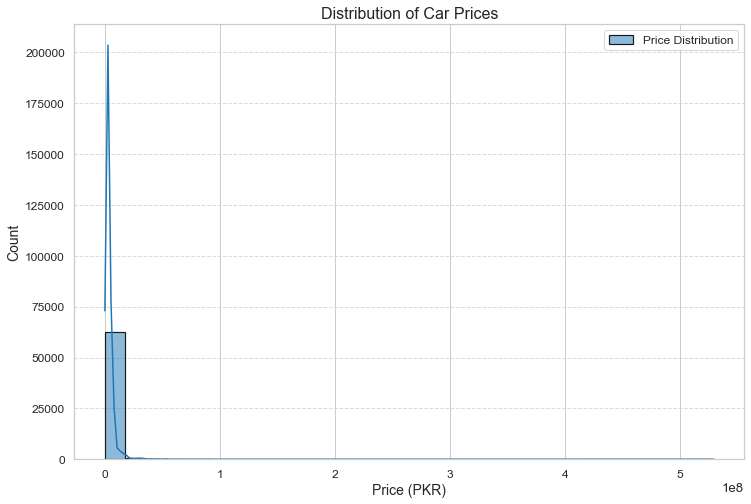

In [9]:
# Set a more visually appealing style
sns.set(style="whitegrid", font_scale=1.2)

# Create a figure and axis with specified size
plt.figure(figsize=(12, 8))

# Plot the distribution using seaborn's histplot
sns.histplot(df['price'], bins=30, kde=True, color='#1f77b4', edgecolor='k', linewidth=1.2, label='Price Distribution')

# Set labels and title with a larger font size
plt.xlabel('Price (PKR)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Car Prices', fontsize=16)

# Customize tick labels and grid appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

In [10]:
#reduction of outliers
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
df1 = df[(df['price'] > Q1 - 1.5 * IQR) & (df['price'] < Q3 + 1.5 * IQR)]


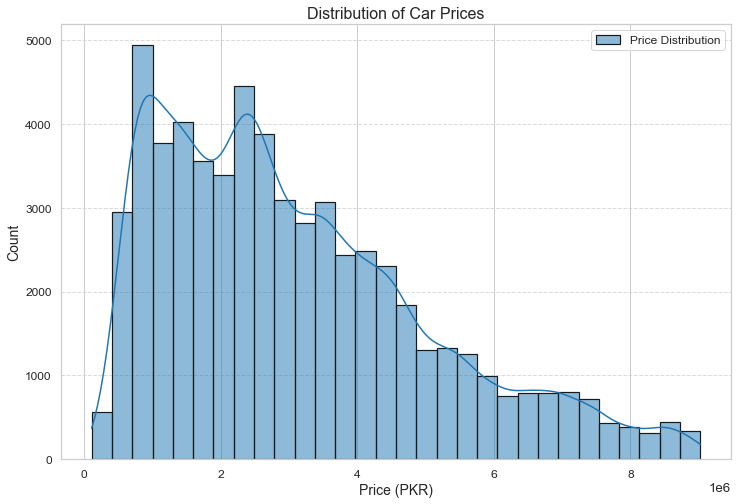

In [11]:
# Set a more visually appealing style
sns.set(style="whitegrid", font_scale=1.2)

# Create a figure and axis with specified size
plt.figure(figsize=(12, 8))

# Plot the distribution using seaborn's histplot
sns.histplot(df1['price'], bins=30, kde=True, color='#1f77b4', edgecolor='k', linewidth=1.2, label='Price Distribution')

# Set labels and title with a larger font size
plt.xlabel('Price (PKR)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Car Prices', fontsize=16)

# Customize tick labels and grid appearance
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend
plt.legend(fontsize=12)

# Show the plot
plt.show()

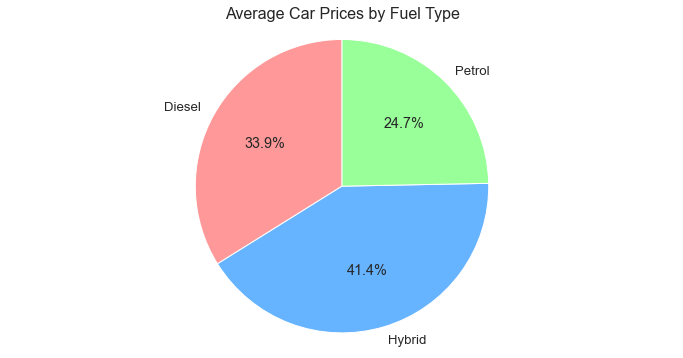

In [12]:
# Calculate average car prices by fuel type
fuel_prices = df1.groupby('fuel')['price'].mean().reset_index()

# Define custom colors for the pie chart slices
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Create a new figure with specified size
plt.figure(figsize=(12, 6))

# Plot a pie chart with fuel types as labels, average prices as values, and percentage as autopct
plt.pie(fuel_prices['price'], labels=fuel_prices['fuel'], autopct='%1.1f%%', colors=colors, startangle=90, wedgeprops={'edgecolor': 'white'})

# Set the title and adjust the font size
plt.title('Average Car Prices by Fuel Type', fontsize=16)

# Set the aspect ratio to be equal for a circular pie chart
plt.axis('equal')

# Display the pie chart
plt.show()


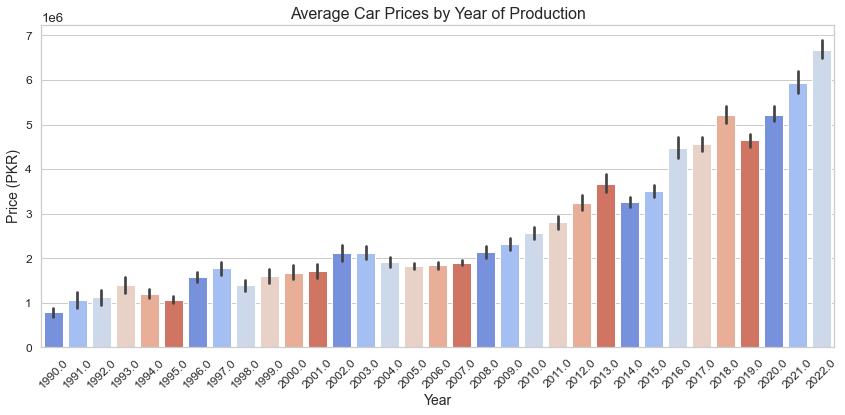

In [13]:
# First Modification
custom_colors = sns.color_palette("coolwarm")
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='price', data=df, palette=custom_colors)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Average Car Prices by Year of Production', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


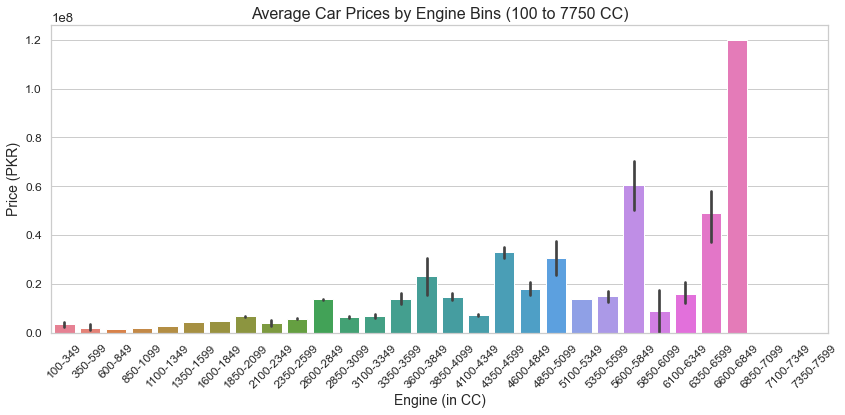

In [14]:
# Create bins for the 'engine' column within the range of 100 to 7750
bins = list(range(100, 7800, 250))  # Creates bins from 100 to 7750 with a step of 250
labels = [f'{start}-{end-1}' for start, end in zip(bins[:-1], bins[1:])]  # Labels for the bins

# Cut the 'engine' column into bins and add labels
df['engine_bins'] = pd.cut(df['engine'], bins=bins, labels=labels, include_lowest=True)

# Modify the code to visualize average car prices by engine bins
custom_colors = sns.color_palette("husl", len(df['engine_bins'].unique()))
plt.figure(figsize=(12, 6))
sns.barplot(x='engine_bins', y='price', data=df, palette=custom_colors)
plt.xlabel('Engine (in CC)', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Average Car Prices by Engine Bins (100 to 7750 CC)', fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


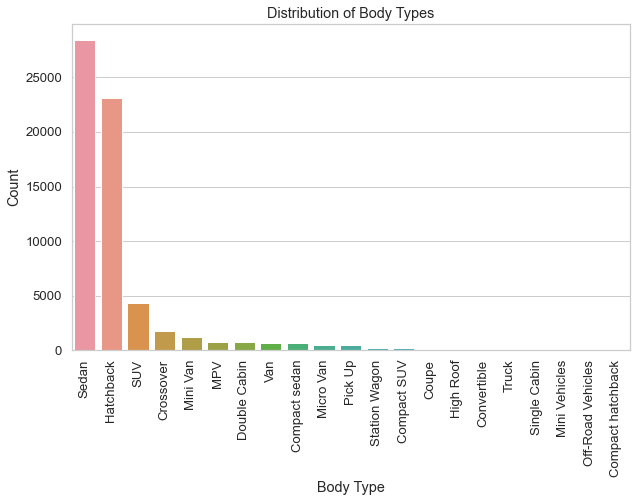

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(x='body', data=df, order=df['body'].value_counts().index)
plt.xlabel('Body Type')
plt.ylabel('Count')
plt.title('Distribution of Body Types')
plt.xticks(rotation=90)
plt.show()

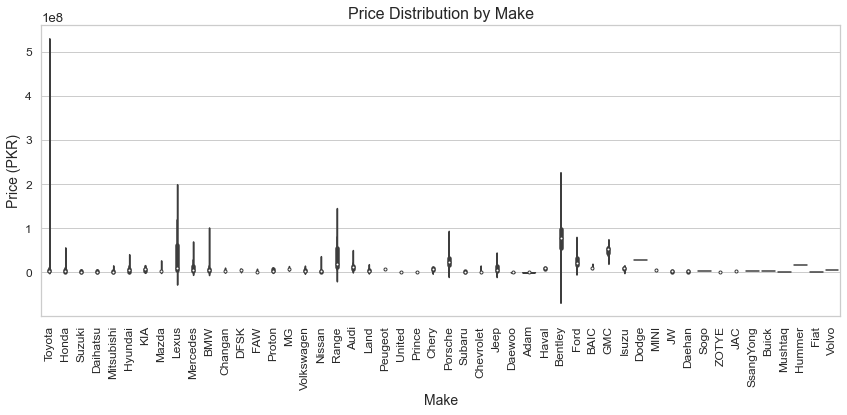

In [16]:
# Set the style and custom colors
sns.set_style('whitegrid')
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Create the violin plot for price distribution by make
plt.figure(figsize=(12, 6))
sns.violinplot(x='make', y='price', data=df, palette=custom_colors)
plt.xlabel('Make', fontsize=14)
plt.ylabel('Price (PKR)', fontsize=14)
plt.title('Price Distribution by Make', fontsize=16)
plt.xticks(rotation=90, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


## Potential investors questions
Investors, when analyzing a dataset related to car data, would be interested in various aspects to assess the potential investment opportunities.

## 1. Market Demand and Preferences:

#### Which city has the highest number of car sales?

Understanding the city with the highest car sales is crucial for investors as it indicates where the demand for cars is the highest. Investing in regions with high demand can lead to quicker turnover rates and potentially higher profits due to increased customer base.

In [17]:
# Answering the question: City with Highest Number of Car Sales
print("City with Highest Number of Car Sales:", df['city'].value_counts().idxmax())



City with Highest Number of Car Sales: Lahore


This code calculates and prints the city with the highest number of car sales. The value_counts() function counts the occurrences of each unique city, and idxmax() returns the index (city name) with the highest count, indicating the city with the most car sales.

### What are the most popular car color and body type among buyers?


Knowing the popular car colors and body types provides insights into consumer preferences. This information is vital for manufacturers and sellers to stock the most demanded variants, ensuring faster sales. For investors, aligning investments with popular choices can increase the likelihood of successful sales.

In [18]:
# Answering the question: Most Popular Car Color and Body Type
print("\nMost Popular Car Color:")
print(df['color'].value_counts().idxmax())

print("\nMost In-Demand Car Body Type:")
print(df['body'].value_counts().idxmax())



Most Popular Car Color:
White

Most In-Demand Car Body Type:
Sedan


These codes calculate and print the most popular car color and body type among buyers, respectively. value_counts() counts the occurrences of each unique color and body type, and idxmax() returns the most common color and body type based on their counts.

# 2. Market Trends and Price Analysis:

### How has the average car price changed over the years?



Analyzing price trends over time helps investors understand the market's evolution. Rising prices may indicate growing demand or inflation, while decreasing prices might suggest market saturation or economic challenges. Investors can adjust their strategies based on these trends.

In [19]:
# Answering the question: Average Car Price Changes Over the Years
print("\nAverage Car Price Changes Over the Years:")
print(df.groupby('year')['price'].mean())



Average Car Price Changes Over the Years:
year
1990.0    7.876968e+05
1991.0    1.070931e+06
1992.0    1.120229e+06
1993.0    1.400868e+06
1994.0    1.206633e+06
1995.0    1.072384e+06
1996.0    1.580772e+06
1997.0    1.773314e+06
1998.0    1.393279e+06
1999.0    1.602613e+06
2000.0    1.676305e+06
2001.0    1.710921e+06
2002.0    2.116481e+06
2003.0    2.125743e+06
2004.0    1.908603e+06
2005.0    1.823305e+06
2006.0    1.840892e+06
2007.0    1.900336e+06
2008.0    2.129627e+06
2009.0    2.323087e+06
2010.0    2.560825e+06
2011.0    2.806160e+06
2012.0    3.249237e+06
2013.0    3.673405e+06
2014.0    3.265749e+06
2015.0    3.501821e+06
2016.0    4.466166e+06
2017.0    4.557740e+06
2018.0    5.203527e+06
2019.0    4.643120e+06
2020.0    5.222623e+06
2021.0    5.924023e+06
2022.0    6.680635e+06
Name: price, dtype: float64


This code calculates and prints the average car price for each year. It uses groupby() to group the data by the 'year' column and then calculates the mean price for each year.

### What is the average price difference between imported and locally assembled cars?

Distinguishing prices between imported and locally assembled cars is vital. Imported cars often command higher prices due to quality and features. Investors can target markets favoring imports for potentially higher margins, whereas markets valuing local assembly might offer competitive pricing.

In [20]:
# Answering the question: Average Price Difference between Imported and Locally Assembled Cars
print("\nAverage Price Difference between Imported and Locally Assembled Cars:")
print(df.groupby('assembly')['price'].mean())



Average Price Difference between Imported and Locally Assembled Cars:
assembly
Imported    5.441975e+06
local       3.319757e+06
Name: price, dtype: float64


This code calculates and prints the average car price for imported and locally assembled cars. It uses groupby() to group the data by the 'assembly' column (imported or locally assembled) and calculates the mean price for each category.

### Is there a correlation between engine and the price of the vehicle?

Understanding the correlation between engine size and price aids investors in pricing strategies. It reveals whether buyers are willing to pay more for powerful engines. This information guides investments, especially in markets where high-performance cars are in demand.

In [21]:
# Answering the question: Correlation between Engine Volume (cc) and Car Price
print("\nCorrelation between Engine Volume (cc) and Car Price:")
print(df[['engine', 'price']].corr())



Correlation between Engine Volume (cc) and Car Price:
          engine     price
engine  1.000000  0.565166
price   0.565166  1.000000


## 3. Customer Preferences and Behavior:

### What is the most preferred transmission type among buyers?

Transmission preference impacts purchasing decisions. Markets favoring automatic transmissions may have higher demand for convenience, whereas manual transmissions might appeal to enthusiasts. Investors aligning their inventory with preferred types can enhance customer satisfaction and sales.

In [22]:
# Answering the question: Most Preferred Transmission Type
print("\nMost Preferred Transmission Type:")
print(df['transmission'].mode().iloc[0])



Most Preferred Transmission Type:
Automatic


### Which fuel type (petrol, diesel, or hybrid) is more commonly chosen by customers?

Understanding fuel preferences is crucial due to environmental concerns and fuel costs. Markets favoring fuel-efficient or eco-friendly options indicate shifting consumer attitudes. Investors can leverage this insight for eco-conscious or budget-friendly offerings.

In [23]:
# Answering the question: Most Common Fuel Type
print("\nMost Common Fuel Type:")
print(df['fuel'].mode().iloc[0])



Most Common Fuel Type:
Petrol


### Is there a correlation between mileage and the price of the vehicle?

Analyzing mileage-price correlation helps investors gauge consumer value perception. Higher prices for low-mileage vehicles suggest buyers prioritize longevity and performance. Understanding this correlation assists in pricing strategies, especially for used cars.

In [24]:
# Answering the question: Correlation between Mileage and Car Price
print("\nCorrelation between Mileage and Car Price:")
print(df[['mileage', 'price']].corr())



Correlation between Mileage and Car Price:
          mileage     price
mileage  1.000000 -0.165226
price   -0.165226  1.000000


## 4. Manufacturer and Model Analysis:

### Which manufacturer has the highest number of car listings?

Identifying dominant manufacturers signals market leaders. Investors can collaborate with popular brands for mutual benefits, enhancing credibility and customer trust. Manufacturers with extensive listings indicate strong market presence and potential investment opportunities.

In [25]:
# Answering the question: Manufacturer with Highest Number of Car Listings
print("\nManufacturer with Highest Number of Car Listings:")
print(df['make'].value_counts().idxmax())



Manufacturer with Highest Number of Car Listings:
Toyota


### What are the top-selling car models in the dataset?


Top-selling models reflect consumer preferences. Investing in these models enhances inventory turnover, ensuring steady sales. Manufacturers or dealerships aligning their offerings with these popular models cater to prevalent consumer choices, fostering customer loyalty.

In [26]:
# Answering the question: Top-Selling Car Models
print("\nTop-Selling Car Models:")
print(df['model'].value_counts().head())



Top-Selling Car Models:
Corolla    11267
Civic       7555
City        4886
Mehran      4263
Cultus      4142
Name: model, dtype: int64


## 5. Registration and Geographic Analysis:

### Which city or province has the highest number of registered cars for sale?


Regions with high registered car listings signify market stability and potential profitability. Investors can target these areas for investments, ensuring demand consistency and minimizing market volatility risks.

In [27]:
# Answering the question: City/Province with Highest Number of Registered Cars for Sale
print("\nCity/Province with Highest Number of Registered Cars for Sale:")
print(df['registered'].value_counts().idxmax())



City/Province with Highest Number of Registered Cars for Sale:
Islamabad


### Is there a difference in average car prices based on the city/province of registration?

Price disparities based on registration locations unveil regional market dynamics. Investors discerning these differences can tailor pricing strategies. Higher prices in specific regions may signify affluent buyers, indicating premium market segments, while lower prices might indicate price-sensitive markets.

In [28]:
# Answering the question: Average Car Prices Based on City/Province of Registration
print("\nAverage Car Prices Based on City/Province of Registration:")
print(df.groupby('registered')['price'].mean())



Average Car Prices Based on City/Province of Registration:
registered
Abbottabad        2.180525e+06
Abdul Hakeem      2.805000e+06
Ahmed Pur East    2.300000e+06
Attock            1.835000e+06
Badin             1.050000e+06
                      ...     
Un-Registered     9.751211e+06
Vehari            1.267500e+06
Wah cantt         5.585000e+06
Wazirabad         1.550000e+06
Zafarwal          3.500000e+06
Name: price, Length: 103, dtype: float64
